In [365]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_columns',30)

In [366]:
data_ingestion_dir = os.path.join(os.getcwd(), "artifact", "data_ingestion")
time_stamp = os.listdir(data_ingestion_dir)[0]
data_dir_name = os.path.join(data_ingestion_dir, time_stamp,"data")
file_name = os.listdir(data_dir_name)[0]
print("File name is ",file_name)
file_path = os.path.join(data_dir_name, file_name)
              

File name is  CreditCard.xls


In [367]:
df = pd.read_excel(file_path, header=1)

In [368]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [369]:
df["default payment next month"].value_counts(normalize=True)

0    0.7788
1    0.2212
Name: default payment next month, dtype: float64

## Observation:

Dataset appears to be imbalanced dataset.

1. Use Stratified shuffle split so that train and test data distributions are similar.
2. Use synthesized data.

In [359]:
ingested_data_dir = os.path.join(data_ingestion_dir, time_stamp,"ingested_data")
train_file_path = os.path.join(ingested_data_dir, "train", "train.csv" )
test_file_path = os.path.join(ingested_data_dir, "test", "test.csv")

In [360]:
train_df = pd.read_csv(train_file_path)
test_df = pd.read_csv(test_file_path)

In [361]:
df_train = train_df.copy()

In [362]:
df_train.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,28022,400000,2,1,2,29,-1,-1,0,0,0,0,5567,13011,22396,26359,41627,16709,13011,10001,5023,20150,5082,4134,0
1,13496,420000,1,2,2,39,0,0,0,0,0,0,204984,209929,190689,173547,176980,180109,8006,7000,6000,6500,6500,10000,0
2,26688,50000,1,1,2,25,2,0,0,0,0,0,48966,49985,50760,49535,30358,30302,2130,1905,1811,1100,1100,1200,0
3,11742,180000,1,2,1,26,-1,-1,-1,-1,-1,-1,396,396,396,396,396,396,396,396,396,396,396,396,0
4,16079,300000,2,3,2,30,-2,-2,-2,-2,-2,-2,0,0,0,0,0,0,0,0,0,0,0,0,1


In [364]:
list(df_train.columns)

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default payment next month']

In [348]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          24000 non-null  int64
 1   LIMIT_BAL                   24000 non-null  int64
 2   SEX                         24000 non-null  int64
 3   EDUCATION                   24000 non-null  int64
 4   MARRIAGE                    24000 non-null  int64
 5   AGE                         24000 non-null  int64
 6   PAY_0                       24000 non-null  int64
 7   PAY_2                       24000 non-null  int64
 8   PAY_3                       24000 non-null  int64
 9   PAY_4                       24000 non-null  int64
 10  PAY_5                       24000 non-null  int64
 11  PAY_6                       24000 non-null  int64
 12  BILL_AMT1                   24000 non-null  int64
 13  BILL_AMT2                   24000 non-null  int64
 14  BILL_A

In [349]:
df_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,24000.0,15017.086500,8676.004048,1.0,7464.50,15045.5,22526.25,30000.0
LIMIT_BAL,24000.0,167687.903333,129974.691354,10000.0,50000.00,140000.0,240000.00,800000.0
SEX,24000.0,1.602208,0.489452,1.0,1.00,2.0,2.00,2.0
EDUCATION,24000.0,1.856292,0.798488,0.0,1.00,2.0,2.00,6.0
MARRIAGE,24000.0,1.550625,0.520847,0.0,1.00,2.0,2.00,3.0
AGE,24000.0,35.432042,9.206171,21.0,28.00,34.0,41.00,79.0
PAY_0,24000.0,-0.018833,1.122214,-2.0,-1.00,0.0,0.00,8.0
PAY_2,24000.0,-0.135833,1.195453,-2.0,-1.00,0.0,0.00,8.0
PAY_3,24000.0,-0.168000,1.195722,-2.0,-1.00,0.0,0.00,8.0
PAY_4,24000.0,-0.220625,1.173282,-2.0,-1.00,0.0,0.00,8.0


## Data Validation

###  Checking for null values

In [350]:
print("Null values \n\n", df_train.isnull().sum())
print("\n\nNA values \n\n", df_train.isna().sum())

Null values 

 ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default payment next month    0
dtype: int64


NA values 

 ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                     

### Checking for duplicates

In [351]:
df[df.duplicated()]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month


### Observation:
1. Dataset does not contain any missing/Null values.
2. Dataset does not have duplicates.

## Exploratory Data Analysis

#### Changing column names for better understanding.

In [352]:
#renaming of columns
df_train.rename(columns={'default payment next month' : 'IsDefaulter'}, inplace=True)
df_train.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL',
                         'PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
df_train.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL',
                         'BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
df_train.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL',
                         'PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'}, inplace=True)


In [353]:
df_train.columns = [name.lower() for name in list(df_train.columns)]

In [336]:
list(df_train.columns)

[<function str.lower()>,
 <function str.lower()>,
 <function str.lower()>,
 <function str.lower()>,
 <function str.lower()>,
 <function str.lower()>,
 <function str.lower()>,
 <function str.lower()>,
 <function str.lower()>,
 <function str.lower()>,
 <function str.lower()>,
 <function str.lower()>,
 <function str.lower()>,
 <function str.lower()>,
 <function str.lower()>,
 <function str.lower()>,
 <function str.lower()>,
 <function str.lower()>,
 <function str.lower()>,
 <function str.lower()>,
 <function str.lower()>,
 <function str.lower()>,
 <function str.lower()>,
 <function str.lower()>,
 <function str.lower()>]

In [207]:
categorical_columns = ['SEX', 'EDUCATION', 'MARRIAGE', 'PAY_SEPT', 'PAY_AUG', 'PAY_JUL', 'PAY_JUN', 'PAY_MAY', 'PAY_APR']
for col in categorical_columns:
    print(col, "==>", df_train[col].unique())

SEX ==> [2 1]
EDUCATION ==> [1 2 3 6 4 5 0]
MARRIAGE ==> [2 1 3 0]
PAY_SEPT ==> [-1  0  2 -2  1  3  4  8  7  5  6]
PAY_AUG ==> [-1  0 -2  2  3  5  4  1  7  6  8]
PAY_JUL ==> [ 0 -1 -2  2  4  3  7  5  1  6  8]
PAY_JUN ==> [ 0 -1 -2  3  2  4  7  5  1  6  8]
PAY_MAY ==> [ 0 -1 -2  2  3  7  4  5  8  6]
PAY_APR ==> [ 0 -1 -2  2  3  7  4  8  5  6]


In [208]:
df_train.replace({'EDUCATION':{6:4,5:4,0:4}}, inplace=True)
df_train.replace({'MARRIAGE':{0:3}}, inplace=True)

In [222]:
#replacing values with labels
df_train.replace({'SEX': {1:'Male', 2: 'Female'}}, inplace=True)
df_train.replace({'IsDefaulter': {1:'Yes', 0: 'No'}}, inplace=True)
df_train.replace({'EDUCATION': {1:'Graduate School', 2:'University', 3:'High School', 4:'Others'}}, inplace=True)
df_train.replace({'MARRIAGE': {1:'Married', 2:'Single', 3:'Others'}}, inplace = True)

In [223]:
#changing categorical col dtype from int to object
for col in categorical_columns:
    df_train[col] = df_train[col].astype(object)
    
df_train['IsDefaulter'] = df_train['IsDefaulter'].astype(object)

In [224]:
df_train.dtypes

ID                int64
LIMIT_BAL         int64
SEX              object
EDUCATION        object
MARRIAGE         object
AGE               int64
PAY_SEPT         object
PAY_AUG          object
PAY_JUL          object
PAY_JUN          object
PAY_MAY          object
PAY_APR          object
BILL_AMT_SEPT     int64
BILL_AMT_AUG      int64
BILL_AMT_JUL      int64
BILL_AMT_JUN      int64
BILL_AMT_MAY      int64
BILL_AMT_APR      int64
PAY_AMT_SEPT      int64
PAY_AMT_AUG       int64
PAY_AMT_JUL       int64
PAY_AMT_JUN       int64
PAY_AMT_MAY       int64
PAY_AMT_APR       int64
IsDefaulter      object
dtype: object

###  Is Defaulter?


In [319]:
ax_label = np.round(df_train['IsDefaulter'].value_counts(normalize = True).values*100,1)
ax_plabel=[]
for i in ax_label:
    ax_plabel.append('{:.1f}%'.format(i))

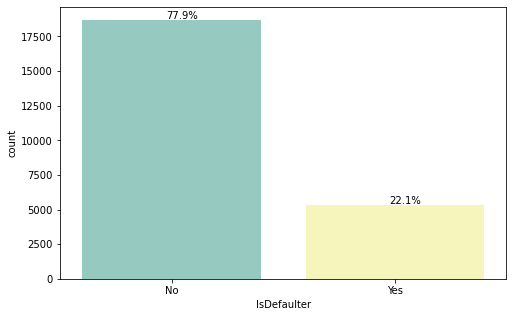

In [328]:
plt.figure(figsize=(8,5))
ax = sns.countplot(x= "IsDefaulter", data=df_train, palette='Set3',
                   order = df_train["IsDefaulter"].value_counts().index)
for p, label in zip(ax.patches, ax_plabel):
    ax.annotate(label, (p.get_x()+0.375, p.get_height()+100))
plt.show()

> Imbalanced dataset

In [282]:
pd.crosstab(df_train['SEX'], df_train['IsDefaulter'], normalize='index')

IsDefaulter,No,Yes
SEX,,
Female,0.791531,0.208469
Male,0.759506,0.240494


In [323]:
ax0_label=np.round(df_train["SEX"].value_counts().values/len(df_train)*100, 1)
ax1_label = np.ravel(np.round(pd.crosstab(df_train['SEX'], df_train['IsDefaulter'], normalize=True).values*100, 1), order='F')
print(ax1_label)
ax1_plabel = []
ax0_plabel = []
for i in ax0_label:
    ax0_plabel.append('{:.1f}%'.format(i))
for i in ax1_label:
    ax1_plabel.append('{:.1f}%'.format(i))
print(ax0_plabel, ax1_plabel)

[47.7 30.2 12.6  9.6]
['60.2%', '39.8%'] ['47.7%', '30.2%', '12.6%', '9.6%']


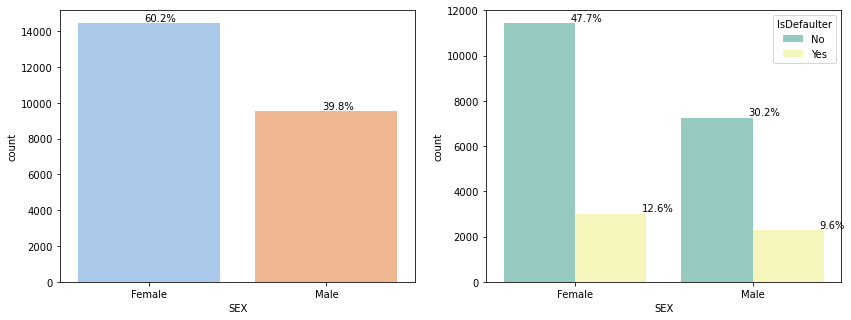

In [327]:

fig = plt.figure(figsize=(14, 5))
ax0 = fig.add_subplot(121)
sns.countplot(x="SEX", data= df_train, palette='pastel', ax=ax0)
for p, label in zip(ax0.patches, ax0_plabel ):
    ax0.annotate(label, (p.get_x()+0.375, p.get_height()+100))

    
ax1 = fig.add_subplot(122)
sns.countplot(x='SEX', hue='IsDefaulter', data=df_train, palette='Set3', ax=ax1)
for p, label in zip(ax1.patches, ax1_plabel):
    ax1.annotate(label, (p.get_x()+0.375, p.get_height()+100))
plt.show()

In [329]:
pd.crosstab(df_train['SEX'], df_train['IsDefaulter'],rownames=["Gender"], colnames=["Is Defaulter"],
            margins=True, margins_name="Total", normalize='index')

Is Defaulter,No,Yes
Gender,,
Female,0.791531,0.208469
Male,0.759506,0.240494
Total,0.778792,0.221208


out of 22.1% of defaulter customers 12.6% of them are females and 9.6% are males.
Though it appears as women tend to default in credit card payments, we should note that we have 60.2% of women in our customer base. If we check based on respective gender proportions, we have 20.8% of female defaulters and 24% of male defaulters.

In [241]:
len(df_train)

24000

In [261]:
np.arange(range(5))

TypeError: unsupported operand type(s) for -: 'range' and 'int'

In [400]:
import re

def use_regex(input_text):
    pattern = re.compile(r"^creditCard[A-Za-z]{5}\_\d{8}\_\d{6}\.csv")
    return pattern.match(input_text)

In [414]:
a = use_regex("creditCardfrain_21112021_213436.csv")

In [415]:
if a:
    print("Match")
else:
    print("No match")

Match


In [417]:
if use_regex("creditCardfrain_21112021_213436.csv"):
    print("match")
else:
    print("bad data")

match


In [419]:
len(df_train.columns)

25